In [1]:
import wrangle as wrg
import scipy.stats as stats
import pandas as pd
import os
import numpy as np

# Data viz:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn stuff:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

import env

In [2]:
sql_query = "select bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, fips from properties_2017 where propertylandusetypeid = 261"
directory = os.getcwd()
url_for_query = wrg.get_db_url("zillow")
filename = "zillow_2017.csv"

In [3]:
zillow_2017 = wrg.get_sql_data(sql_query, url_for_query, filename)

csv found and loaded


In [4]:
zillow_2017 = zillow_2017.dropna()

In [5]:
zillow_2017.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
zillow_2017.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0


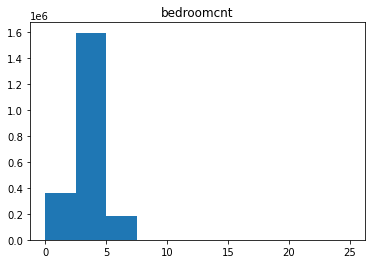

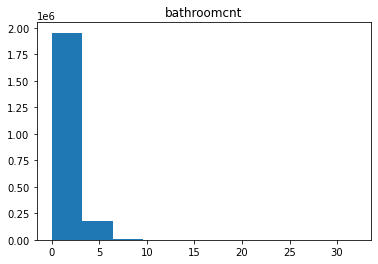

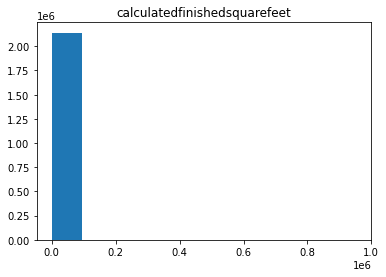

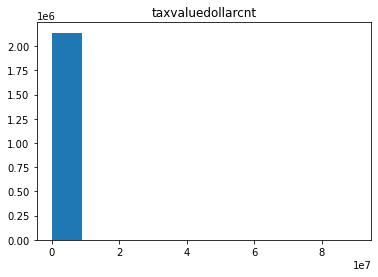

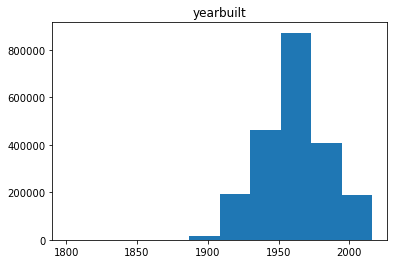

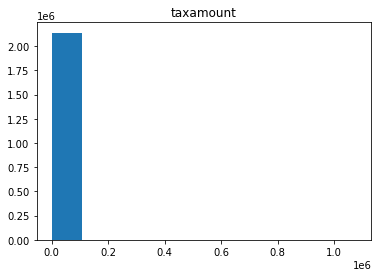

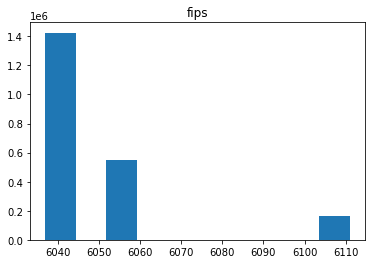

In [6]:
wrg.plot_uni_var(zillow_2017)

In [9]:
train_zillow_2017, validate_zillow_2017, test_zillow_2017 = wrg.split_function_cont_target(zillow_2017)



In [ ]:
#1

In [10]:
train_zillow_2017.shape

(1284141, 7)

In [15]:
x_train, x_validate = train_zillow_2017[["bedroomcnt","bathroomcnt","calculatedfinishedsquarefeet","yearbuilt","fips"]],validate_zillow_2017[["bedroomcnt","bathroomcnt","calculatedfinishedsquarefeet","yearbuilt","fips"]]
y_train, y_validate = train_zillow_2017.taxvaluedollarcnt, validate_zillow_2017.taxvaluedollarcnt

In [16]:
scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

In [17]:
x_validate_scaled = scaler.transform(x_validate)

In [18]:
df_x_train_scaled = pd.DataFrame(x_validate_scaled)

In [19]:
df_x_train_scaled.head()

,0,1,2,3,4
0,0.200000,0.062500,0.001451,0.725581,0.000000
1,0.133333,0.031250,0.001649,0.600000,0.297297
2,0.266667,0.093750,0.002021,0.781395,0.297297
3,0.266667,0.078125,0.002096,0.827907,1.000000
4,0.333333,0.125000,0.007184,0.827907,0.297297


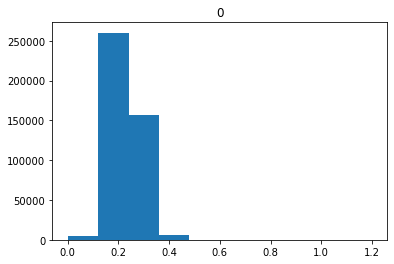

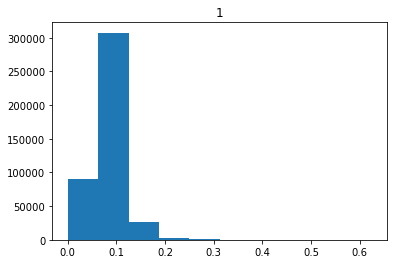

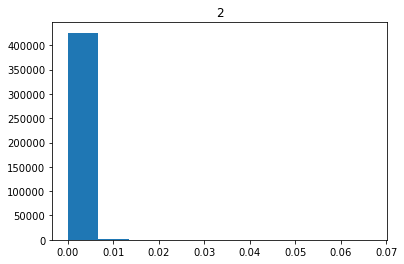

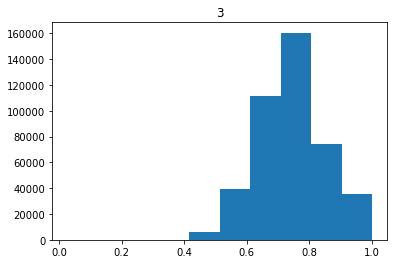

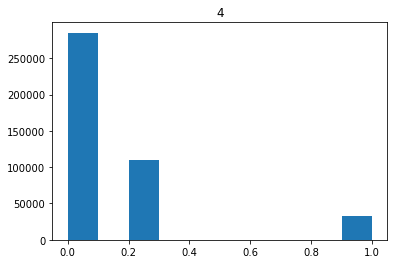

In [20]:
wrg.plot_uni_var(df_x_train_scaled)